In [604]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from Cell import Cell
from Population import Population
sns.set_style('ticks')
colors = ['#0a1ff5', '#3ec154', '#676767']
sns.set_palette(sns.color_palette(colors))

## Make populations

In [605]:
# parameters
N_i = 100 # initial N
t_max = 1000 # length of simulation
cell_type = None
num_cells = 2
trait = 0.1
R = None
mt = None
g = None
size = None
env_stoch = True
responsive = False
dorm = False

if num_cells == 1:
    cell_type = "A" # if only one cell type, make them all A


cell_args = {
    'ty': cell_type,
    'trait': trait,
    'R': R,
    'mt': mt,
    'g': g,
    'size': size
}

R_i = {
    'A': 0,
    'B': 0,
    'C': 100
}
pop = Population(
    [ Cell(**cell_args) for i in range(N_i) ], 
    R_i, responsive=responsive, dorm=dorm
)

## simulate

In [606]:
freqA = [pop.freq('A')]
mean_trait = [pop.trait_mean()]
trait_a = [pop.trait_mean('A')]
trait_b = [pop.trait_mean('B')]
D = [len(pop.dormant)]
Na = [pop.density('A')]
Nb = [pop.density('B')]
r_a = [R_i['A']]
r_b = [R_i['B']]
r_c = [R_i['C']]
R = [pop.R()]
Ra = [pop.R('A')]
Rb = [pop.R('B')]
Da = [pop.density_d('A')]
Db = [pop.density_d('B')]
resc = [len(pop.new_active)]

if env_stoch: # environmental stochasticity mode
    C_flow = [0 for i in range(15)] + [100]

else: 
    C_flow = [100]

for t in range(t_max):


    pop.timestep()

    pop.resources['C'] += np.random.choice(C_flow)

    R.append(pop.R())
    Ra.append(pop.R('A'))
    Rb.append(pop.R('B'))
    
    freqA.append(pop.freq('A'))
    Na.append(pop.density('A'))
    Nb.append(pop.density('B'))
    mean_trait.append(pop.trait_mean())
    trait_a.append(pop.trait_mean('A'))
    trait_b.append(pop.trait_mean('B'))
    D.append(len(pop.dormant))
    r_a.append(pop.resources['A'])
    r_b.append(pop.resources['B'])
    r_c.append(pop.resources['C'])
    Da.append(pop.density_d('A'))
    Db.append(pop.density_d('B'))
    resc.append(len(pop.new_active))

/home/fordfishman/anaconda3/envs/ibm/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/fordfishman/anaconda3/envs/ibm/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## plot

### densities over time

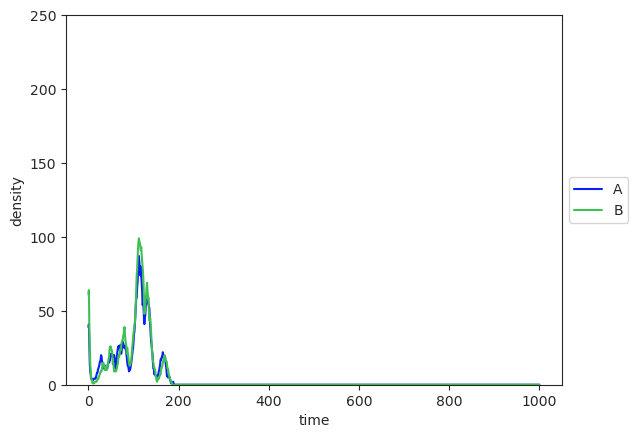

In [607]:
N = np.array(Na)+ np.array(Nb)
ts = range(t_max+1)
fig, ax = plt.subplots()
ax.plot(ts, Na, label='A', )
ax.plot(ts, Nb, label='B')
# ax.plot(ts, N, label='Total N')
ax.set_xlabel('time')
ax.set_ylabel('density')
ax.set_ylim(bottom=0.0,top=250)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

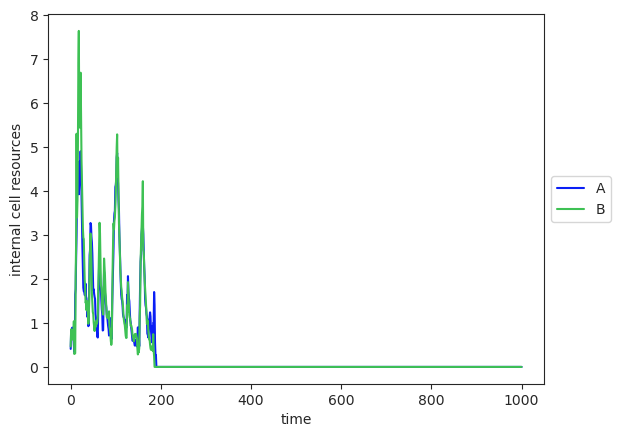

In [608]:
fig, ax = plt.subplots()
# ax.plot(ts, R, label='total')
ax.plot(ts, Ra, label='A')
ax.plot(ts, Rb, label='B')
ax.set_xlabel('time')
ax.set_ylabel('internal cell resources')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### p(a) over time

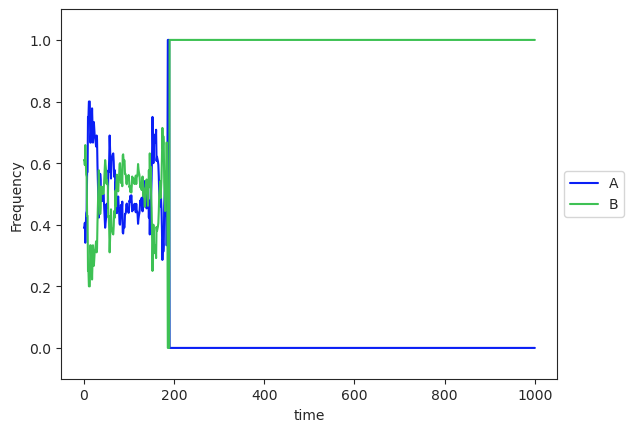

In [609]:
fig, ax = plt.subplots()
ax.plot(ts, freqA, label='A')
ax.plot(ts, 1-np.array(freqA), label='B')
ax.set_xlabel('time')
ax.set_ylabel('Frequency')
ax.set_ylim(0,1)
ax.set_ylim(bottom=-0.1,top=1.1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Mean Trait Value

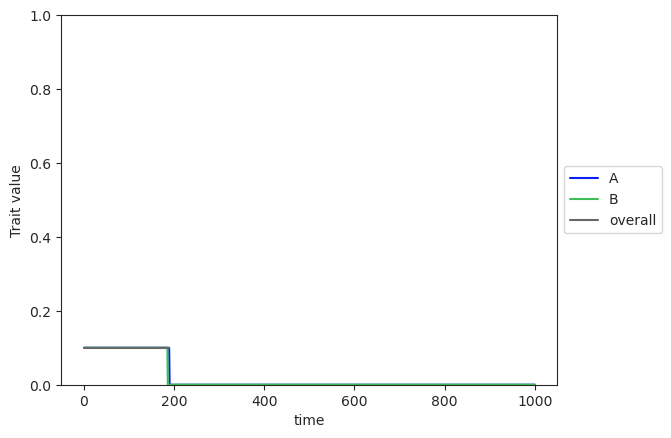

In [610]:
fig, ax = plt.subplots()
ax.plot(ts, trait_a, label='A')
ax.plot(ts, trait_b, label='B')
ax.plot(ts, mean_trait, label='overall')
ax.set_xlabel('time')
ax.set_ylabel('Trait value')
ax.set_ylim(0,1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Number of dormant cells over time

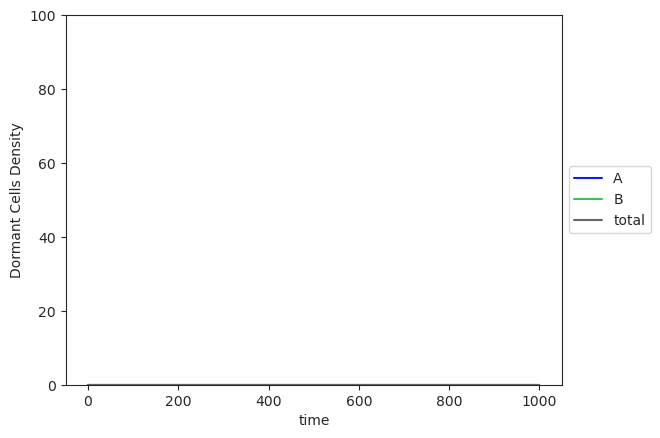

In [611]:
fig, ax = plt.subplots()
ax.plot(range(1, t_max+1), Da[1:len(D)], label='A')
ax.plot(range(1, t_max+1), Db[1:len(D)], label='B')
ax.plot(range(1, t_max+1), D[1:len(D)], label='total')
ax.set_xlabel('time')
ax.set_ylabel('Dormant Cells Density')
ax.set_ylim(bottom=0.0,top=100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Number of cells resuscitated at a given timestep

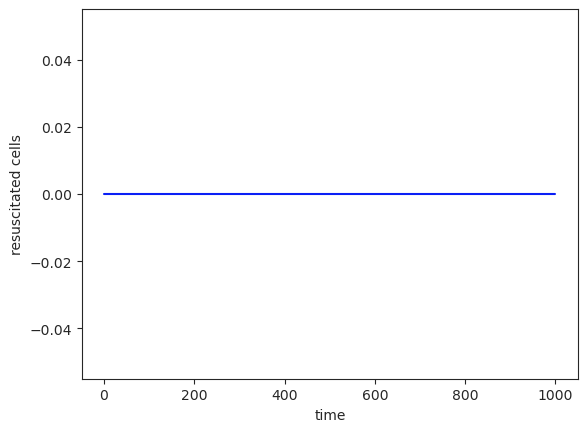

In [612]:
fig, ax = plt.subplots()
ax.plot(range(1, t_max+1), resc[1:len(D)], label='total')
ax.set_xlabel('time')
ax.set_ylabel('resuscitated cells')
# plt.legend()
plt.show()

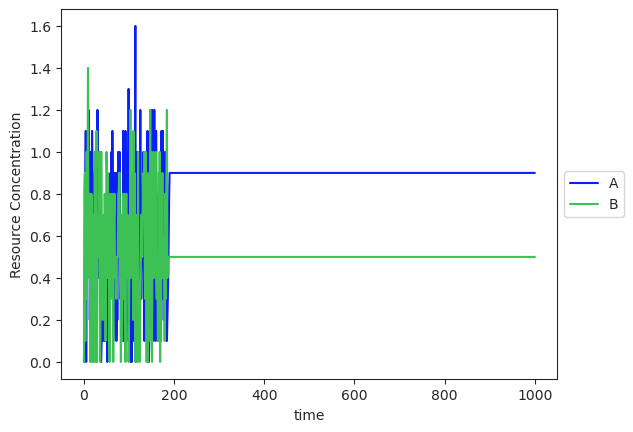

In [613]:
fig, ax = plt.subplots()
ax.plot(ts, r_a, label='A')
ax.plot(ts, r_b, label='B')
# ax.plot(ts, r_c, label='C')
ax.set_xlabel('time')
ax.set_ylabel('Resource Concentration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()